In [4]:
start = '2015-01-01'
end = '2025-01-01'
stock = 'GOOG'

data = yf.download(stock, start, end)

/tmp/ipython-input-4-1879734153.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-01-02,26.014023,26.334236,25.978830,26.222210,28951268
1,2015-01-05,25.471745,25.990231,25.431595,25.937192,41196796
2,2015-01-06,24.881382,25.585999,24.836276,25.527755,57998800
3,2015-01-07,24.838755,25.143303,24.766880,25.131208,41301082
4,2015-01-08,24.917072,24.956727,24.338112,24.684596,67071641
...,...,...,...,...,...,...
2511,2024-12-24,197.108261,197.208018,194.741796,195.711524,6809800
2512,2024-12-26,196.639359,197.696879,195.412222,196.280199,7907900
2513,2024-12-27,193.586487,196.340046,191.523327,196.010815,14693000


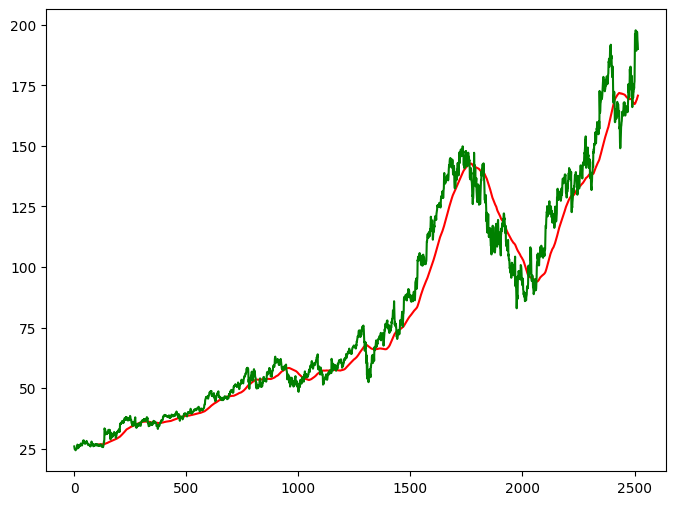

In [7]:
ma_100_days = data.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

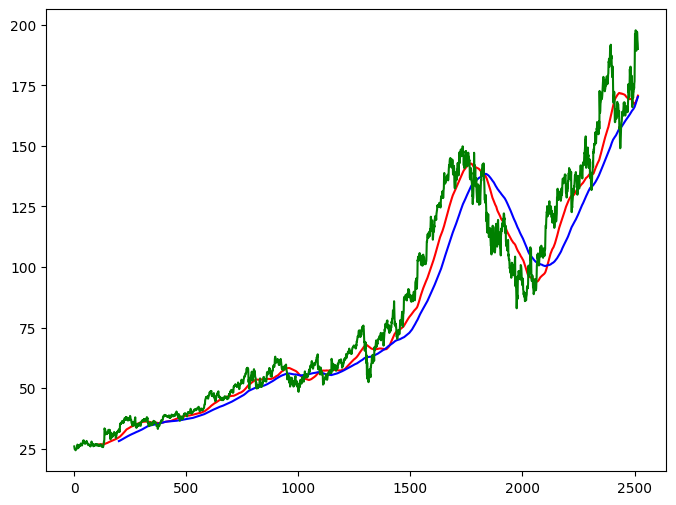

In [8]:
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
data.dropna(inplace=True)
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):])

In [10]:
data_train.shape[0]

2012

In [11]:
data_test.shape[0]

504

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scale = scaler.fit_transform(data_train)

In [14]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [15]:
x, y = np.array(x), np.array(y)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation= 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dense(units =1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [19]:
model.fit(x,y, epochs = 50, batch_size=32, verbose =1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 293ms/step - loss: 0.0916
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 278ms/step - loss: 0.0025
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 282ms/step - loss: 0.0022
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 306ms/step - loss: 0.0020
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 286ms/step - loss: 0.0020
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 288ms/step - loss: 0.0015
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - loss: 0.0018
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 329ms/step - loss: 0.0018
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step - loss: 0.0017
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 297ms/step - loss: 0.0013
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - loss: 0.0015
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 282ms/step - loss: 0.0014
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - loss: 0.0015
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 269ms/step - loss: 0.0014
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
pas_100_days = data_train.tail(100)

In [25]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [26]:
data_test_scale = scaler.fit_transform(data_test)

In [27]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [29]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step


In [32]:
scale = 1/scaler.scale_

In [33]:
y_predict = y_predict*scale

In [34]:
y = y*scale

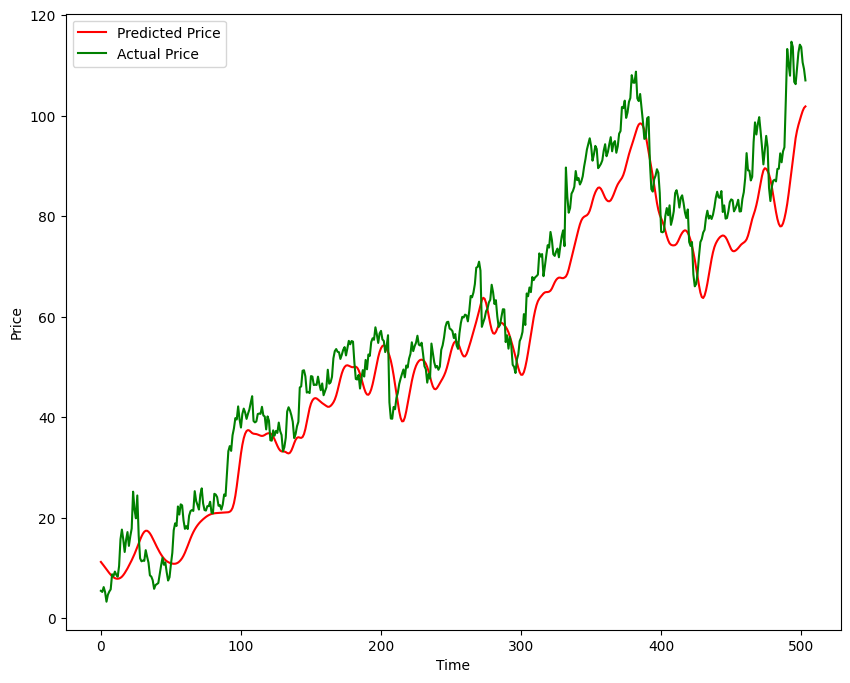

In [37]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')

: 